<a href="https://colab.research.google.com/github/hiromi-in/100day_python_udemy/blob/main/0_100_Chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/2/data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [97]:
#1 「Adult Income Dataset」のCSVを読み込み、最初の5行を表示してください。
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [105]:
#2 データセットに含まれる行と列の数、各列のデータ型を表示してください。
print("(row, column): ", df.shape)
print("Data types: \n", df.dtypes)

(row, column):  (48842, 15)
Data types: 
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [106]:
#3 データセットの各列における欠損値（NaNやnull）の数を確認し、表示してください。
df.isnull().sum()


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [111]:
#4 「workclass」列の欠損値をその列の最頻値で置き換えてください。
df2 = df.copy()
print("Before fillna: ", df2['workclass'].isnull().sum())
df2['workclass'] = df2['workclass'].fillna(df2['workclass'].mode()[0])
print("After fillna: ", df2['workclass'].isnull().sum())

Before fillna:  963
After fillna:  0


In [114]:
#5 'marital-status', 'occupation', 'relationship', 'race' の各カテゴリー変数をダミー変数に変換して数値表現してください。
df_dummies = pd.get_dummies(df2[['marital-status','occupation','relationship', 'race']], prefix=(['marital-status','pccupation','relationship', 'race']), dtype=np.int8)
df_concat = pd.concat([df2, df_dummies])
df_concat

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [118]:
#6 「age」列を用いて、年齢を '若年（<35歳）', '中年（35-54歳）', '高年（>54歳）' の3つのグループに分ける新しい列「age_group」を作成してください。
df2['age_group'] = df['age'].map(lambda x: '若年' if x < 35 else('中年' if x >= 35 and x < 55 else '高年'))
df2[['age', 'age_group']]

,age,age_group
0,39,中年
1,50,中年
2,38,中年
3,53,中年
4,28,若年
...,...,...
48837,39,中年
48838,64,高年
48839,38,中年
48840,44,中年


In [127]:
#7 「hours-per-week」列における外れ値を四分位範囲（IQR）を用いて検出し、その数を出力してください。
Q1 = df2['hours-per-week'].quantile(0.25)
Q3 = df2['hours-per-week'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(Q1, Q3)
print(lower_bound)
print(upper_bound)
df2['hours-per-week'][(df2['hours-per-week']<lower_bound) | (df2['hours-per-week']>upper_bound)].count()

40.0 45.0
32.5
52.5


13496

In [141]:
#8 「hours-per-week」列の外れ値を、それぞれの四分位数（第1四分位数または第3四分位数）で置き換えてください。
df2['hours-per-week-v2'] = df2['hours-per-week'].map(lambda x: Q1 if x < Q1 else(Q3 if x > Q3 else x))
print(df2['hours-per-week-v2'].min())
print(df2['hours-per-week-v2'].max())
print(df2['hours-per-week-v2'][(df2['hours-per-week-v2']<lower_bound) | (df2['hours-per-week-v2']>upper_bound)].count())

40.0
45.0
0


In [130]:
#9 「capital-gain」と「capital-loss」列に対数変換を適用してください。ただし、0の値がある場合は1を加えてから対数変換を行うことで、数学的エラーを避けてください。
df2[['log_capital-gain', 'log_capital-loss']]=np.log1p(df2[['capital-gain', 'capital-loss']])
df2[['capital-gain', 'capital-loss','log_capital-gain', 'log_capital-loss']]

,capital-gain,capital-loss,log_capital-gain,log_capital-loss
0,2174,0,7.684784,0.0
1,0,0,0.000000,0.0
2,0,0,0.000000,0.0
3,0,0,0.000000,0.0
4,0,0,0.000000,0.0
...,...,...,...,...
48837,0,0,0.000000,0.0
48838,0,0,0.000000,0.0
48839,0,0,0.000000,0.0
48840,5455,0,8.604471,0.0


In [131]:
#10 「capital-gain」と「capital-loss」の差分を取って（「capital-gain」から「capital-loss」を引いて）新しい列「net_capital_gain」を作成してください。
df2['net_capital_gain'] = df2['capital-gain'] - df2['capital-loss']
df2[['capital-gain','capital-loss', 'net_capital_gain']]

,capital-gain,capital-loss,net_capital_gain
0,2174,0,2174
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
48837,0,0,0
48838,0,0,0
48839,0,0,0
48840,5455,0,5455


In [133]:
#11 「sex」列にある値を、'Male'は0、'Female'は1にマッピングして新しい列「gender_numeric」を作成してください。
df2['gender_numeric']=df2['sex'].map(lambda x: 0 if x == 'Male' else 1)
df2[['sex', 'gender_numeric']]

,sex,gender_numeric
0,Male,0
1,Male,0
2,Male,0
3,Male,0
4,Female,1
...,...,...
48837,Female,1
48838,Male,0
48839,Male,0
48840,Male,0


In [138]:
#12 「occupation」列に含まれる一意な値と、それぞれの値がデータセットに何回出現するかを表示してください。
df2['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [139]:
#13 以下のデータを含む新しいデータフレームを作成してください。
data = {
    '名前': ['Alice', 'Bob', 'Charlie'],
    '年齢': [34, 45, 23],
    '収入': [72000, 48000, 31000]
    }

df_test = pd.DataFrame(data)
df_test

,名前,年齢,収入
0,Alice,34,72000
1,Bob,45,48000
2,Charlie,23,31000


In [5]:
#14 「education-num」列の平均、中央値、標準偏差を計算してください。
print('Mean value of [education-num]: ', df['education-num'].mean())
print('Median value of [education-num]: ', df['education-num'].median())
print('Standard deviation of [education-num]: ', np.std(df['education-num']))

Mean value of [education-num]:  10.078088530363212
Median value of [education-num]:  10.0
Standard deviation of [education-num]:  2.5709464361754084


In [6]:
#15 「education」ごとに「hours-per-week」の平均を計算してください。（教育レベルごとに「hours-per-week」の平均労働時間を計算してください）
df.groupby('education')['hours-per-week'].mean()

,hours-per-week
education,
10th,36.986321
11th,33.952539
12th,35.374429
1st-4th,38.761134
5th-6th,38.923379
7th-8th,39.003141
9th,38.359788
Assoc-acdm,40.809494
Assoc-voc,41.658418


In [7]:
#16 「education」ごとに「hours-per-week」の平均を計算するピボットテーブルを作成してください
pd.pivot_table(df, values='hours-per-week', index='education', aggfunc='mean')

,hours-per-week
education,
10th,36.986321
11th,33.952539
12th,35.374429
1st-4th,38.761134
5th-6th,38.923379
7th-8th,39.003141
9th,38.359788
Assoc-acdm,40.809494
Assoc-voc,41.658418


In [8]:
#17 「age」が40歳以上で「hours-per-week」が40時間以上のすべての人々のデータを抽出してください。
df5 = df[(df['age']>=40) & (df['hours-per-week']>=40)]
print(df5['age'].min())
print(df5['hours-per-week'].min())

40
40


In [9]:
#18 「Adult Income Dataset」のデータフレームから偶数行だけを抽出してください。ここでの「偶数行」とは、データフレームのインデックスが偶数（0, 2, 4, ...）である行を指します。
df.iloc[[i for i in range(0,len(df.index)) if i % 2 == 0]]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48832,61,Private,89686,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,<=50K.
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.


In [142]:
#19 「occupation」列に含まれる特定の職業（例: 'Exec-managerial', 'Prof-specialty', 'Sales'）のみを含むデータを抽出してください。
df[df['occupation'].isin(['Exec-managerial', 'Prof-specialty', 'Sales'])]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48832,61,Private,89686,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.


In [11]:
#20 「age」列を基準にしてデータを昇順にソートしてください。その後、「hours-per-week」列を基準にデータを降順にソートしてください。
df[['age','hours-per-week']].sort_values(['age','hours-per-week'], ascending = [True, False])

,age,hours-per-week
42197,17,50
48600,17,50
335,17,48
4667,17,45
9971,17,45
...,...,...
12451,90,10
18413,90,10
46519,90,10
44432,90,7


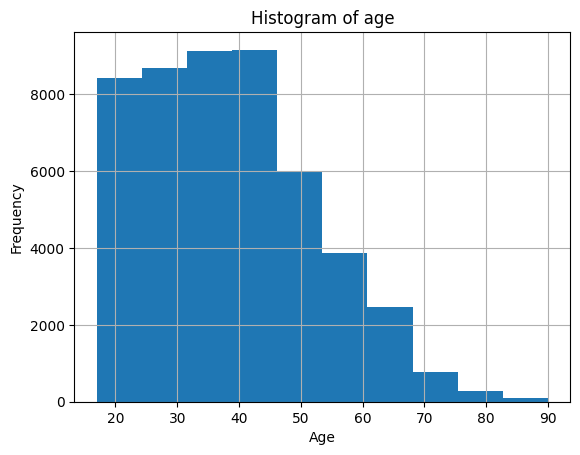

In [12]:
#21  「age」列の分布を確認するためにグラフを描画してください。
plt.hist(df['age'])
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

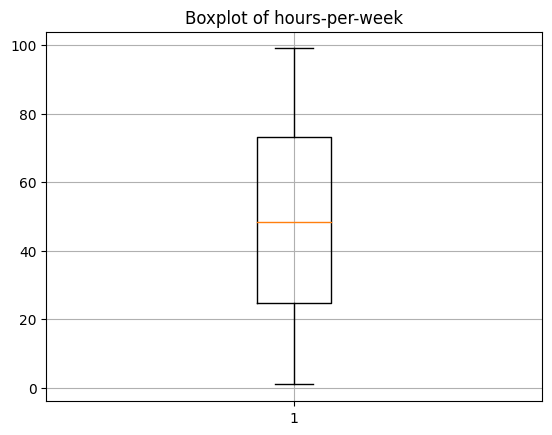

Minimum:  1
Max:  99


In [13]:
#22 「hours-per-week」列の最大値、最小値が分かるようにグラフを描画してください。

plt.boxplot(df['hours-per-week'].unique())
plt.title('Boxplot of hours-per-week')
plt.grid(True)
plt.show()

print('Minimum: ', df['hours-per-week'].min())
print('Max: ', df['hours-per-week'].max())

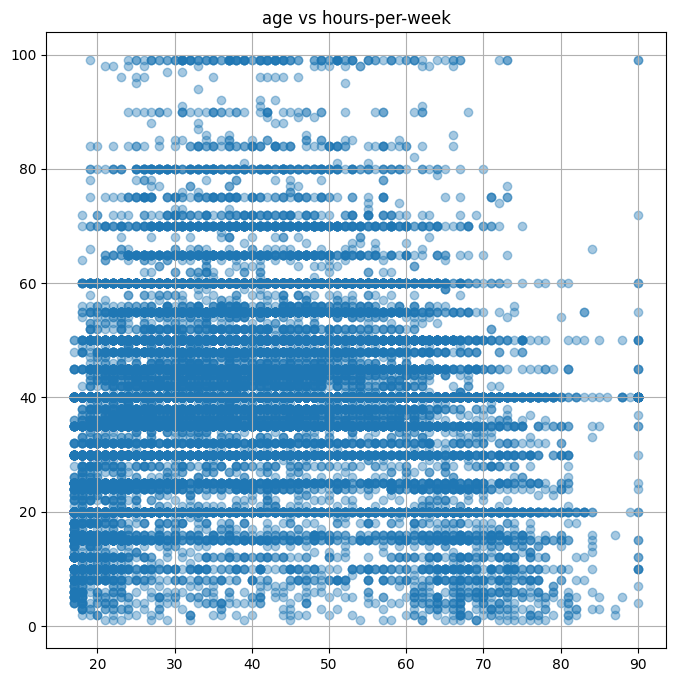

In [36]:
#23 「age」と「hours-per-week」の関係を可視化できるようにグラフを描画してください
plt.figure(figsize=(8,8))
plt.scatter(x=df['age'], y=df['hours-per-week'], alpha=0.4)
#sns.scatterplot(data=df, x='age', y='hours-per-week')
plt.title('age vs hours-per-week')
plt.grid(True)
plt.show()
#hours_mean = df.groupby('age')['hours-per-week'].mean()



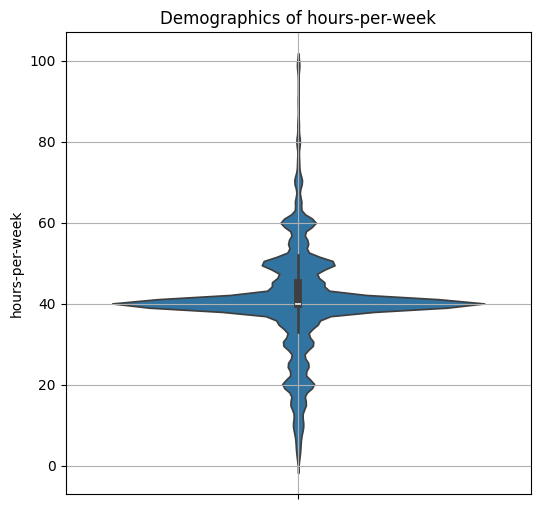

Minimum value:  1
Max value:  99


In [24]:
#24 「hours-per-week」列の最大値や最小値、中央値が分かるようにグラフで描画してください。ただしデータの分布も合わせて確認できるように描画してください。
plt.figure(figsize=(6,6))
sns.violinplot(y='hours-per-week', data=df)
plt.title('Demographics of hours-per-week')
plt.grid(True)
plt.show()
print('Minimum value: ', df['hours-per-week'].min())
print('Max value: ', df['hours-per-week'].max())

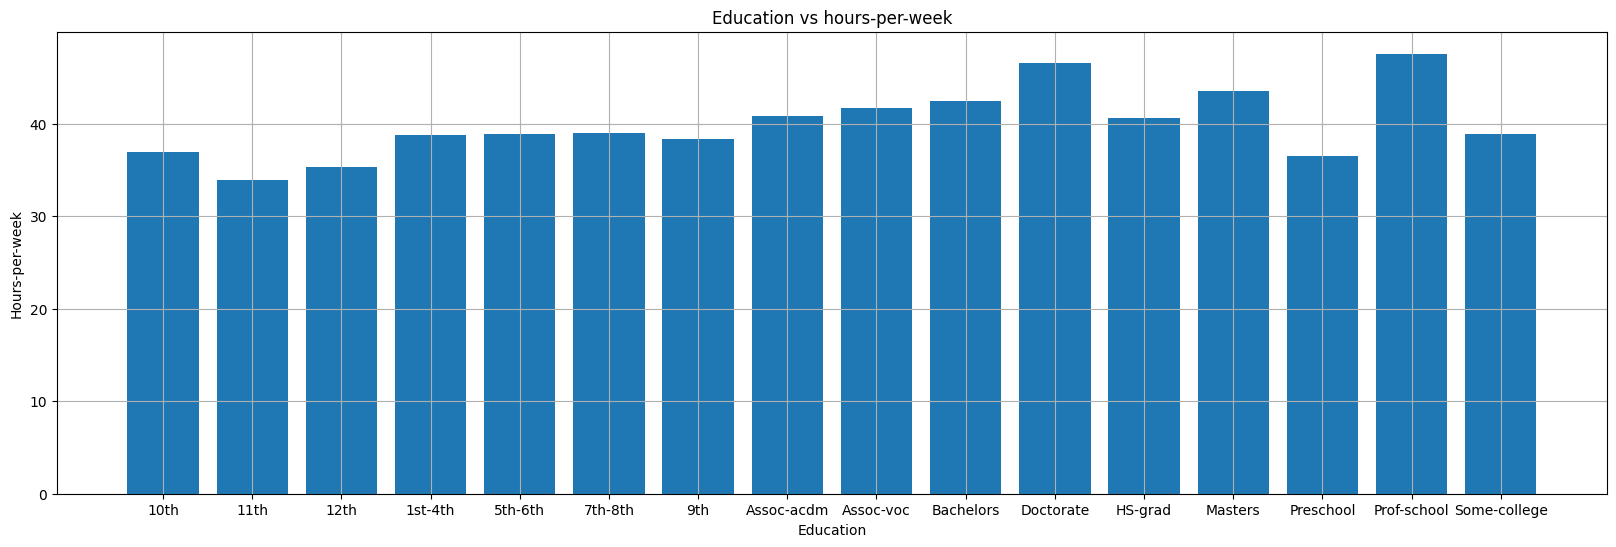

In [144]:
#25 「education」による「hours-per-week」の平均値をグラフで描画してください。
df_mean = df.groupby('education')['hours-per-week'].mean()
plt.figure(figsize=(20,6))
plt.bar(x=df_mean.index, height=df_mean.values)
plt.title('Education vs hours-per-week')
plt.xlabel('Education')
plt.ylabel('Hours-per-week')
#plt.xticks(rotation=45)
plt.grid(True)
plt.show()

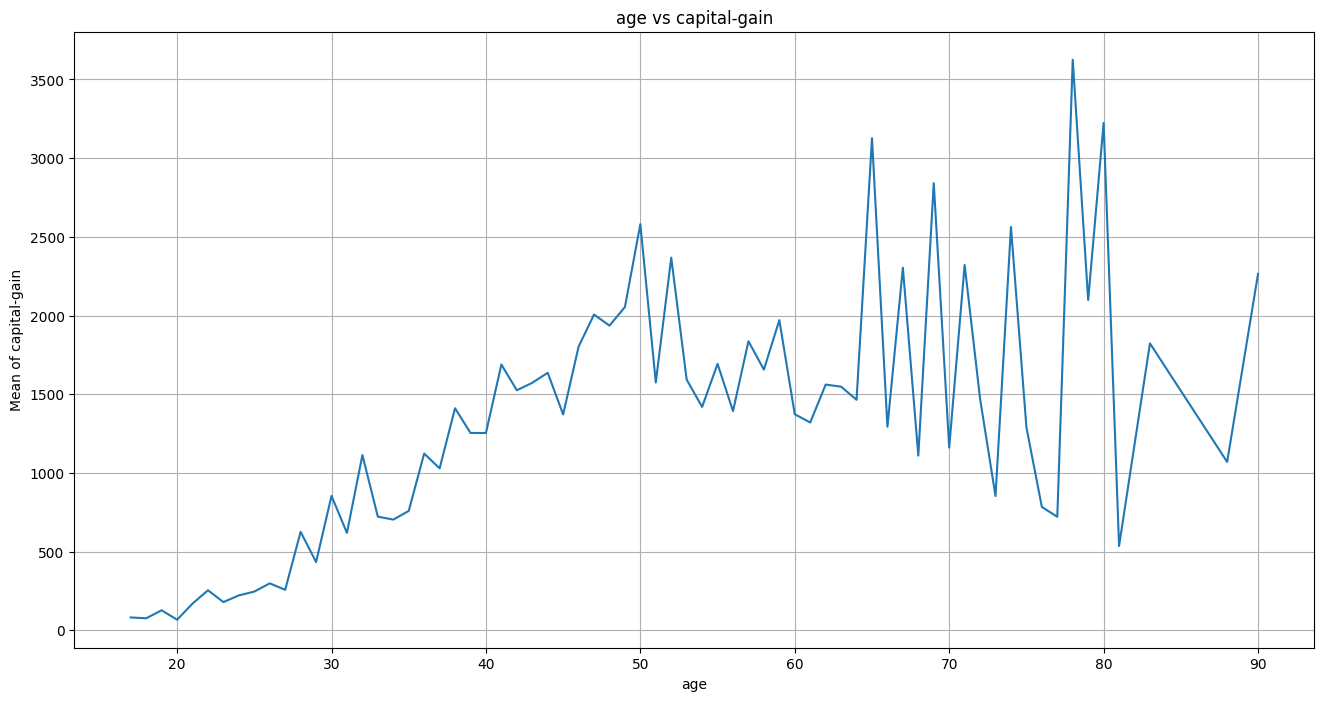

In [61]:
#26 「age」による「capital-gain」の平均値を、年齢ごとの推移が分かるようにグラフで描画してください
df_mean = df.groupby('age')['capital-gain'].mean()
df_mean = df_mean[df_mean.values != 0]
plt.figure(figsize=(16,8))
df_mean.plot()
plt.xlabel('age')
plt.ylabel('Mean of capital-gain')
plt.title('age vs capital-gain')
plt.grid(True)
plt.show()

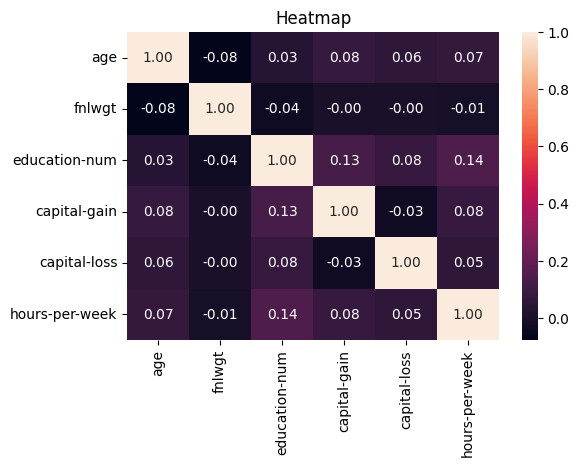

In [69]:
#27 数値列の相関係数のヒートマップを作成してください。
df7=df.copy()
corr_matrix = df7.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Heatmap')
plt.show()

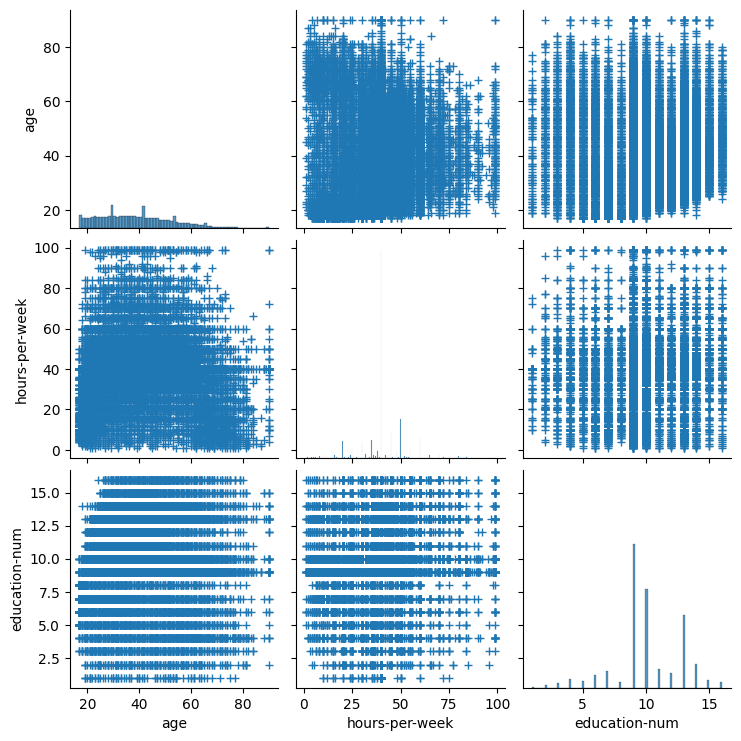

In [73]:
#28 「age」,「hours-per-week」,「education-num」のペアワイズ関係をペアプロットで表示してください。
df8 = df7[['age', 'hours-per-week', 'education-num']]
sns.pairplot(df8, plot_kws=dict(marker="+", linewidth=1))
plt.show()

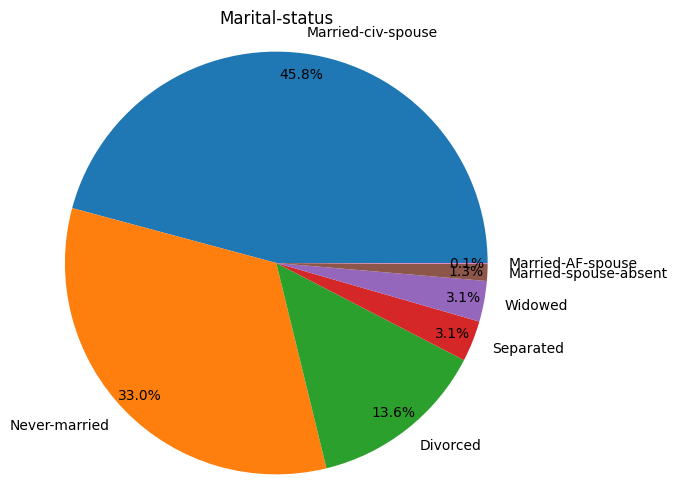

In [80]:
#29 「marital-status」の各カテゴリーごとの割合をパイチャートで表示してください。
status_count = df['marital-status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', pctdistance = 0.9)
plt.title('Marital-status')
plt.axis("equal")
plt.show()

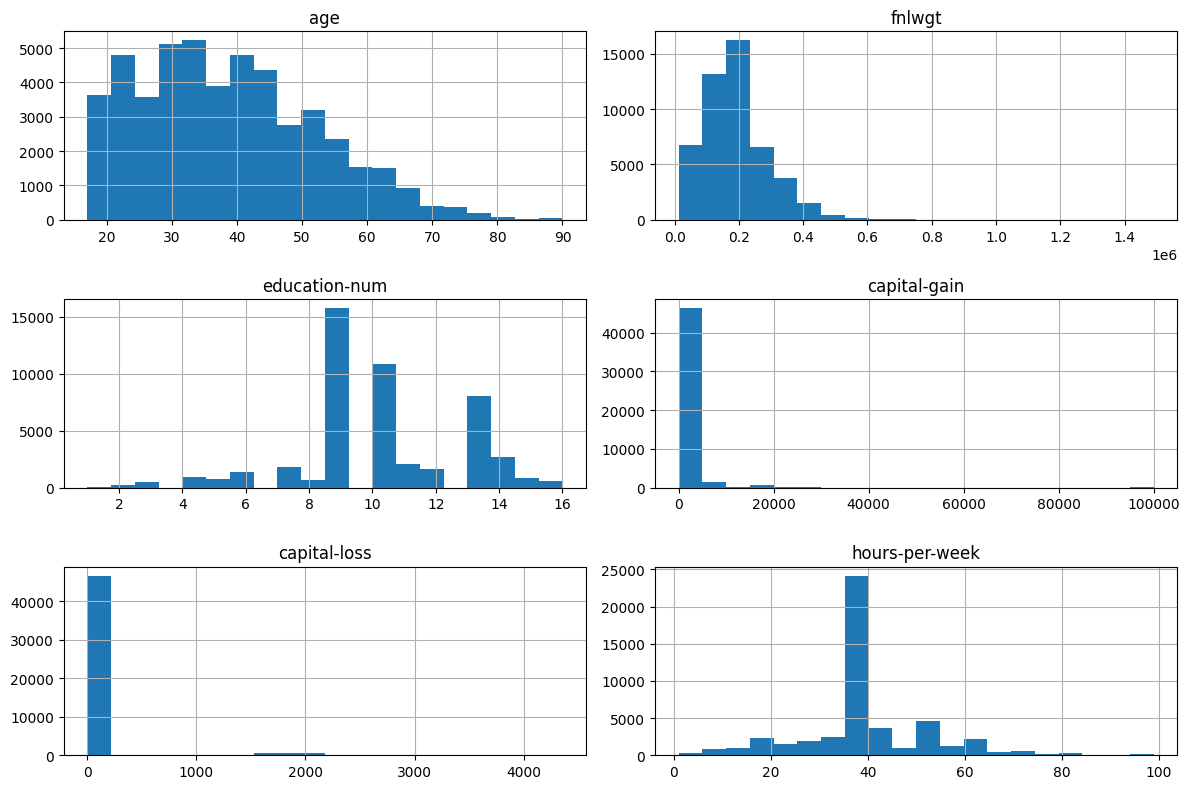

In [150]:
#30 データセット内の全ての数値カラムに対してヒストグラムを描画してください。ただしforループも活用して、1度にすべてのヒストグラムを2列で描画できるようにしてください。
df9 = df.copy()
df9 = df9.select_dtypes(exclude=['object'])
df9_columns = df9.columns

plt.figure(figsize = (12,8))
for i, column in enumerate(df9_columns, start=1):
  plt.subplot(3,2, i)
  plt.hist(df9[column], bins=20)
  #plt.hist(df9[column])
  plt.title(column)
  plt.grid(True)
  plt.tight_layout()
